In [594]:
#import libraries for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['figure.figsize'] = (20 , 20)

In [595]:
# download dataset
#!curl -L -o ./data/ipl.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/850/original/IPL_2008-2024.csv?1760202529"

# 📝 Question 1: Data Preprocessing & Feature Engineering (15 points)

### Task:

1. Load the IPL dataset and perform comprehensive EDA
2. Handle missing values appropriately with justification
3. Create these new features:
   - `home_advantage`: Boolean indicating if team1 is playing in their home city
   - `match_importance`: Categorical (league/playoff/final) based on date and season
   - `toss_advantage`: Whether toss winner won the match
   - `season_phase`: Early/Mid/Late season

### Deliverables:

- Clean dataset with no missing values
- Visualization showing distribution of matches across venues
- Statistical summary of win percentages for toss winners


In [596]:
# load dataset
df = pd.read_csv('./data/ipl.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## EDA on indivisual columns:


## 1. city


Percentage of missing data: 4.66


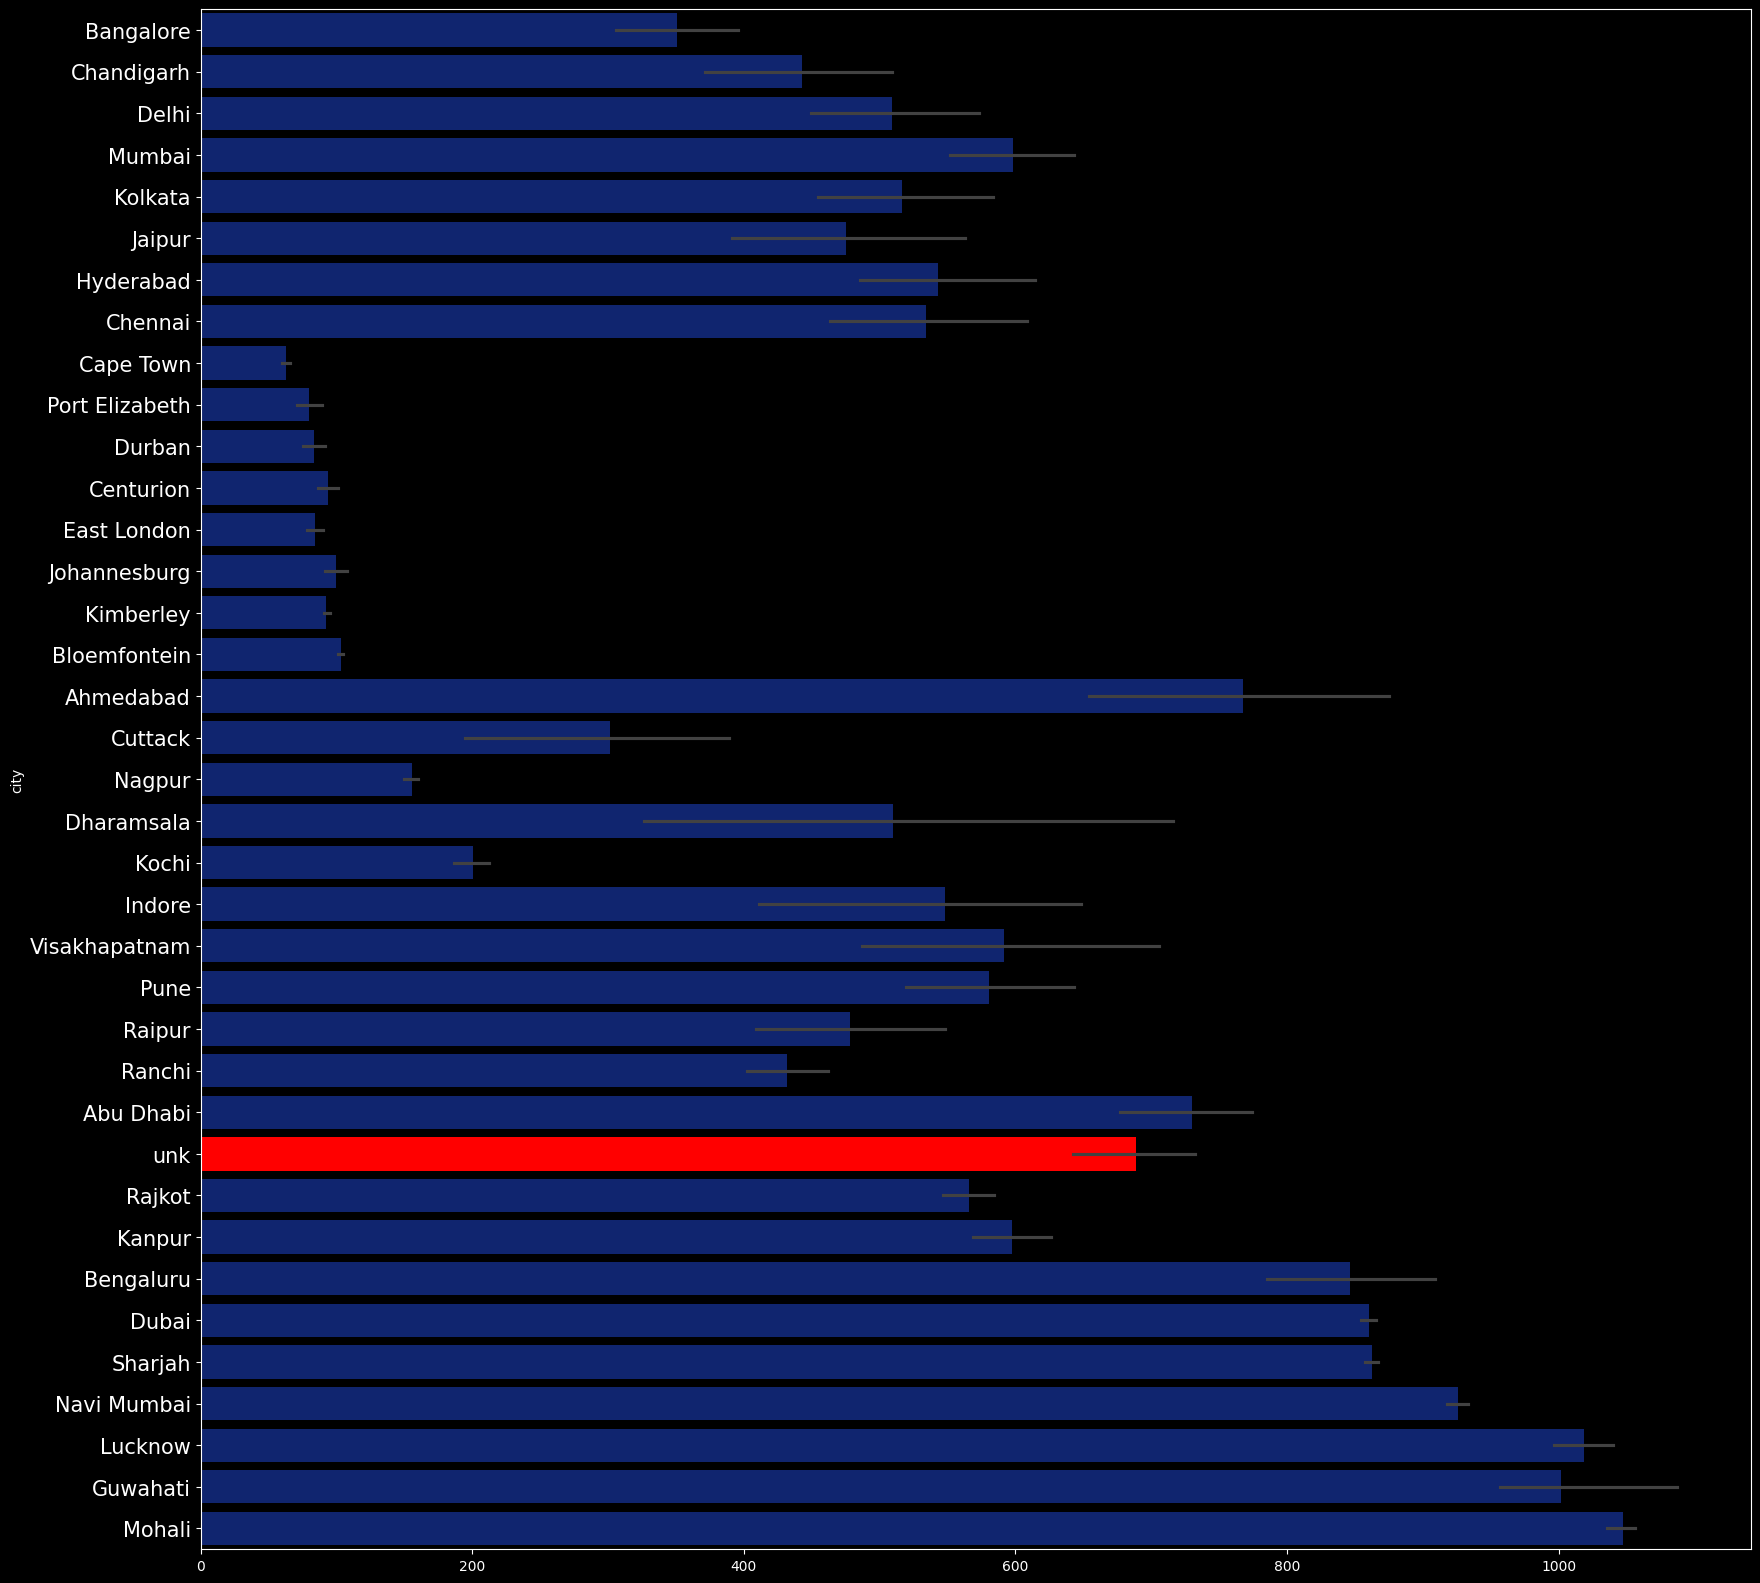

In [598]:
# skip features such as id and session since they are not-null
# columns to check = ['city' , 'player_of_match' , 'winner' , 'result_margin' , 'target_runs/overs' , 'method']

# 1. city:
city = df['city']

pmissing = (np.sum(city.isnull()) / city.size) * 100
print(f"Percentage of missing data: {np.round(pmissing , 2)}")

city = city.fillna('unk')
ax = sns.barplot(city)
bars = ax.patches
yticks = [t.get_text() for t in ax.get_yticklabels()]
yind = yticks.index('unk')
bars[yind].set_facecolor('red')

plt.yticks(fontsize = 15)
plt.show()

df['city'] = city

# stratergy -> replace missing data with unk token, to represent the set of cities that hosted a match but were never mentioned.



### 2. player of match:


In [599]:
pom = df['player_of_match']
df[pom.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- since there are just 5 matches where no result was declared so both player_of_matcha and winner features are missing, we again replace the null value with unk token for sanity purposes(I love nlp!).


In [600]:
df['player_of_match'] = df['player_of_match'].fillna('unk')
df['winner'] = df['winner'].fillna('unk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 3. result_margin


In [601]:
df[df['result_margin'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2010,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,unk,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


### for missing result_margin, its either a tie or no-result in match/ match abandoned. we replace NaN values with 0, since 0 margin = no-result/tie


In [602]:
df['result_margin'] = df['result_margin'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 4. target_runs/overs:


In [603]:
truns = df['target_runs']
tovers = df['target_overs']
df[tovers.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,0.0,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,0.0,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,unk,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,unk,no result,0.0,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/full-scorecard
- I researched the first match and found out the game was abandoned due to extreme rain.
- This jibes with our previous pre-processing that says no-result for result feature.


### we replace missing target_overs/runs values with zero, via the analogy no item = 0 item.


In [604]:
df['target_runs'] = truns.fillna(0)
df['target_overs'] = tovers.fillna(0)

### 5. method feature:

- if a match finished under normal conditions then no external method to determine the winner of the match was used -> match finished under normal conditions - 1074/1095 matches.


In [605]:
method = df['method']
print(f"% of matches finished normally: { np.sum(method.isnull()) / df.shape[0]}")
df['method'] = method.fillna('normal')

% of matches finished normally: 0.9808219178082191


Q. Create these new features:

- `home_advantage`: Boolean indicating if team1 is playing in their home city
- `match_importance`: Categorical (league/playoff/final) based on date and season
- `toss_advantage`: Whether toss winner won the match
- `season_phase`: Early/Mid/Late season


In [606]:
# addressing the problem of teams that renamed themselves over the years
# 1. Royal Challengers Bangaluru -> Royal Challengers Bangalore
# 2. Kings XI Punjab -> Punjab Kings
# 3. Rising Pune Supergiants -> Rising Pune Supergiant
# 4. Delhi Daredevils -> Delhi Capitals
def change_team_name(x):
    if(x == 'Royal Challengers Bengaluru'):
        return 'Royal Challengers Bangalore'
    if(x == 'Kings XI Punjab'):
        return 'Punjab Kings'
    if(x == 'Rising Pune Supergiants'):
        return 'Rising Pune Supergiant'
    if(x == 'Delhi Daredevils'):
        return 'Delhi Capitals'
    return x
t1 = df['team1'].apply(lambda x: change_team_name(x))
t2 = df['team2'].apply(lambda x : change_team_name(x))
df['winner'] = df['winner'].apply(change_team_name)
df['team1'] = t1
df['team2'] = t2


print(f"cities: {df['city'].unique()} \n teams: {df['team1'].unique()}")

# create a map of team and home city
# team to city
ttc = {
    'Royal Challengers Bangalore' : ['Bangalore'],
    'Punjab Kings' : ["Mohali" , 'Chandigarh'],
    'Mumbai Indians' : ['Navi Mumbai' , 'Mumbai'],
    'Kolkata Knight Riders' : ['Kolkata'],
    'Rajasthan Royals' : ['Jaipur'],
    'Deccan Chargers' : ['Hyderabad' , 'Cuttuck' , 'Navi Mumbai'],       #deccan had alternating home-grounds
    'Chennai Super Kings' : ['Chennai'],
    'Kochi Tuskers Kerala' : ['Kochi'],
    'Pune Warriors' : ['Pune'],
    'Sunrisers Hyderabad' : ['Hyderabad'],
    'Gujarat Lions': ['Rajkot'],
    'Rising Pune Supergiant' : ['Pune'],
    'Delhi Capitals' : ["Delhi"],
    'Lucknow Super Giants' : ['Lucknow'],
    'Gujarat Titans' : ['Ahmedabad']
}

def is_home_team(data):
    # print(data['city'])
    return data['city'] in ttc[data['team1']]
df['home_advantage'] = df.apply(lambda x : is_home_team(x), axis = 1)

df.sample(5)

cities: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'unk' 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali'] 
 teams: ['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Lucknow Super Giants' 'Gujarat Titans']


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage
374,598050,2013,Mumbai,2013-05-07,League,SR Tendulkar,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,Mumbai Indians,runs,65.0,171.0,20.0,N,normal,HDPK Dharmasena,S Ravi,True
46,336031,2008,Chandigarh,2008-05-23,League,SE Marsh,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Deccan Chargers,Kings XI Punjab,...,Punjab Kings,wickets,6.0,176.0,20.0,N,normal,Asad Rauf,SJ Davis,True
603,1082617,2017,Kolkata,2017-04-23,League,NM Coulter-Nile,Eden Gardens,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,82.0,132.0,20.0,N,normal,CB Gaffaney,CK Nandan,True
1013,1359538,2023,Dharamsala,2023-05-17,League,RR Rossouw,"Himachal Pradesh Cricket Association Stadium, ...",Delhi Capitals,Punjab Kings,Punjab Kings,...,Delhi Capitals,runs,15.0,214.0,20.0,N,normal,KN Ananthapadmanabhan,MV Saidharshan Kumar,False
667,1136592,2018,Delhi,2018-05-02,League,RR Pant,Arun Jaitley Stadium,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,Delhi Capitals,runs,4.0,151.0,12.0,N,D/L,CK Nandan,VK Sharma,True


In [607]:
# match importance
from sklearn.preprocessing import OrdinalEncoder
print(f"{df['match_type'].unique()}")
fcats = df['match_type'].str.strip().str.lower().replace({
    'qualifier 1': 'playoff',
    'qualifier 2': 'playoff',
    'eliminator': 'playoff',
    'semi final': 'playoff',
    '3rd place play-off': 'playoff',
    'league': 'league',
    'final': 'final'
})
df['match_importance'] = pd.Categorical(fcats , categories = ['league' , 'playoff' , 'final'] , ordered = True)
df.sample(10)

['League' 'Semi Final' 'Final' '3rd Place Play-Off' 'Qualifier 1'
 'Elimination Final' 'Qualifier 2' 'Eliminator']


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance
225,501249,2011,Jaipur,2011-05-09,League,M Vijay,Sawai Mansingh Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,...,runs,63.0,197.0,20.0,N,normal,K Hariharan,SJA Taufel,True,league
318,548378,2012,Pune,2012-05-22,Qualifier 1,YK Pathan,Subrata Roy Sahara Stadium,Delhi Capitals,Kolkata Knight Riders,Kolkata Knight Riders,...,runs,18.0,163.0,20.0,N,normal,BR Doctrove,SJA Taufel,False,playoff
789,1216522,2020,unk,2020-10-17,League,AB de Villiers,Dubai International Cricket Stadium,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,...,wickets,7.0,178.0,20.0,N,normal,AK Chaudhary,Nitin Menon,False,league
473,829737,2015,Bangalore,2015-04-19,League,Harbhajan Singh,M Chinnaswamy Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,...,runs,18.0,210.0,20.0,N,normal,RK Illingworth,VA Kulkarni,True,league
503,829797,2015,Chennai,2015-05-10,League,RA Jadeja,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,...,runs,12.0,158.0,20.0,N,normal,M Erasmus,CK Nandan,True,league
590,1082604,2017,Kolkata,2017-04-15,League,RV Uthappa,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,...,runs,17.0,173.0,20.0,N,normal,AY Dandekar,NJ Llong,True,league
822,1254064,2021,Mumbai,2021-04-15,League,JD Unadkat,"Wankhede Stadium, Mumbai",Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,3.0,148.0,20.0,N,normal,S Ravi,VK Sharma,False,league
940,1304111,2022,Mumbai,2022-05-17,League,RA Tripathi,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,...,runs,3.0,194.0,20.0,N,normal,CB Gaffaney,N Pandit,False,league
392,598067,2013,Pune,2013-05-19,League,LJ Wright,Subrata Roy Sahara Stadium,Pune Warriors,Delhi Capitals,Pune Warriors,...,runs,38.0,173.0,20.0,N,normal,NJ Llong,SJA Taufel,True,league
20,336003,2008,Chandigarh,2008-05-03,League,IK Pathan,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Kolkata Knight Riders,Kings XI Punjab,...,runs,9.0,179.0,20.0,N,normal,DJ Harper,I Shivram,True,league


In [608]:
# toss advantage: weather toss wineer won the match or not!
df['toss_advantage'] = df[['toss_winner' , 'winner']].apply(lambda x : x['toss_winner'] == x['winner'] , axis = 1)
print(f"winning rate of toss winners: {np.round((np.sum(df['toss_advantage']) / df.shape[0]) * 100 , 2)}")
df[['toss_winner' , 'winner' , 'toss_advantage']].sample(10)

winning rate of toss winners: 43.47


,toss_winner,winner,toss_advantage
511,Royal Challengers Bangalore,unk,False
21,Deccan Chargers,Royal Challengers Bangalore,False
354,Kolkata Knight Riders,Mumbai Indians,False
803,Mumbai Indians,Mumbai Indians,True
782,Delhi Capitals,Mumbai Indians,False
223,Kochi Tuskers Kerala,Royal Challengers Bangalore,False
944,Mumbai Indians,Mumbai Indians,True
832,Punjab Kings,Punjab Kings,True
492,Delhi Daredevils,Rajasthan Royals,False
731,Rajasthan Royals,Rajasthan Royals,True


In [609]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df = df.sort_values(['season' , 'date']).reset_index(drop = True)
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance,toss_advantage
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,140.0,223.0,20.0,N,normal,Asad Rauf,RE Koertzen,True,league,False
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,33.0,241.0,20.0,N,normal,MR Benson,SL Shastri,True,league,True
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,9.0,130.0,20.0,N,normal,Aleem Dar,GA Pratapkumar,True,league,False
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,5.0,166.0,20.0,N,normal,SJ Davis,DJ Harper,True,league,False
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,5.0,111.0,20.0,N,normal,BF Bowden,K Hariharan,True,league,False


In [610]:
df['match_number'] = df.groupby(['season']).cumcount() + 1
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance,toss_advantage,match_number
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,223.0,20.0,N,normal,Asad Rauf,RE Koertzen,True,league,False,1
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,241.0,20.0,N,normal,MR Benson,SL Shastri,True,league,True,2
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,130.0,20.0,N,normal,Aleem Dar,GA Pratapkumar,True,league,False,3
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,166.0,20.0,N,normal,SJ Davis,DJ Harper,True,league,False,4
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,111.0,20.0,N,normal,BF Bowden,K Hariharan,True,league,False,5


In [611]:
# total matches per season:
# df.groupby('season').agg({'match_number': 'count'}).rename(columns = {'match_number' : 'total_matches'})
total_matches = df.groupby('season').size().to_dict()
df['total_matches'] = df.apply(lambda x : total_matches[x['season']], axis = 1)
df['early_cut'] = (df['total_matches'] / 3).astype(int)
df['mid_cut'] = (2 * df['total_matches'] / 3).astype(int)

def getPhase(x):
    if x['match_number'] < x['early_cut']:
        return 'Early'
    if x['match_number'] < x['mid_cut']:
        return 'Mid'
    return 'Early'
df['season_phase'] = df.apply(getPhase , axis = 1)
df.sample(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,umpire1,umpire2,home_advantage,match_importance,toss_advantage,match_number,total_matches,early_cut,mid_cut,season_phase
1004,1359529,2023,Chennai,2023-05-10,League,RA Jadeja,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Delhi Capitals,Chennai Super Kings,...,CB Gaffaney,NA Patwardhan,True,league,True,55,74,24,49,Early
934,1304105,2022,Mumbai,2022-05-12,League,DR Sams,"Wankhede Stadium, Mumbai",Chennai Super Kings,Mumbai Indians,Mumbai Indians,...,Chirra Ravikanthreddy,CB Gaffaney,False,league,True,59,74,24,49,Early
356,598031,2013,Kolkata,2013-04-26,League,JH Kallis,Eden Gardens,Kolkata Knight Riders,Punjab Kings,Kings XI Punjab,...,CK Nandan,S Ravi,True,league,False,35,76,25,50,Mid
731,1178411,2019,Jaipur,2019-04-20,League,SPD Smith,Sawai Mansingh Stadium,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,...,S Ravi,YC Barde,False,league,True,36,60,20,40,Mid
742,1178422,2019,Kolkata,2019-04-28,League,AD Russell,Eden Gardens,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,...,IJ Gould,Nitin Menon,True,league,False,47,60,20,40,Early
950,1359475,2023,Ahmedabad,2023-03-31,League,Rashid Khan,"Narendra Modi Stadium, Ahmedabad",Chennai Super Kings,Gujarat Titans,Gujarat Titans,...,Nitin Menon,HAS Khalid,False,league,True,1,74,24,49,Early
227,501251,2011,Chandigarh,2011-05-10,League,BA Bhatt,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Mumbai Indians,Mumbai Indians,...,SK Tarapore,RJ Tucker,True,league,False,53,73,24,48,Early
583,1082597,2017,Mumbai,2017-04-09,League,N Rana,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,Nitin Menon,CK Nandan,True,league,True,7,59,19,39,Early
56,336039,2008,Mumbai,2008-05-31,Semi Final,M Ntini,Wankhede Stadium,Chennai Super Kings,Punjab Kings,Kings XI Punjab,...,Asad Rauf,DJ Harper,False,playoff,False,57,58,19,38,Early
875,1254117,2021,Dubai,2021-10-15,Final,F du Plessis,Dubai International Cricket Stadium,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,...,Nitin Menon,RK Illingworth,False,final,False,60,60,20,40,Early


# 📝 Question 2: Text Analytics - Player Performance Analysis (10 points)

### Task:

Using **Bag of Words (BOW)** and **TF-IDF** techniques:

1. Create a corpus from all unique `player_of_match` names across seasons
2. Build a BOW representation of player names
3. Create a TF-IDF matrix to identify most distinctive player names per season
4. Find players who appear most frequently in specific venues

### Bonus:

Create a word cloud of most frequent 'Player of Match' winners

```python
# Your code here
```


In [612]:
# venue column data cleaning:
venue = df['venue']
def clean_venue(venue):
    if ',' in venue:
        return str(venue.strip().split(',')[0])
    return venue

def clean2(venue):
    if venue.startswith('Punjab'):
        return 'Punjab Cricket Association IS Bindra Stadium'
    if 'Chinnaswamy' in venue:
        return 'M.Chinnaswamy Stadium'
    return venue
    
nvenue = venue.apply(clean_venue)
nvenue = nvenue.apply(clean2)
df['nvenue'] = nvenue
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,umpire2,home_advantage,match_importance,toss_advantage,match_number,total_matches,early_cut,mid_cut,season_phase,nvenue
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,RE Koertzen,True,league,False,1,58,19,38,Early,M.Chinnaswamy Stadium
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,SL Shastri,True,league,True,2,58,19,38,Early,Punjab Cricket Association IS Bindra Stadium
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,GA Pratapkumar,True,league,False,3,58,19,38,Early,Feroz Shah Kotla
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,DJ Harper,True,league,False,4,58,19,38,Early,Wankhede Stadium
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,K Hariharan,True,league,False,5,58,19,38,Early,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,VK Sharma,False,league,False,67,71,23,47,Early,Rajiv Gandhi International Stadium
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,R Pandit,False,playoff,False,68,71,23,47,Early,Narendra Modi Stadium
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,MV Saidharshan Kumar,False,playoff,True,69,71,23,47,Early,Narendra Modi Stadium
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,VK Sharma,False,playoff,False,70,71,23,47,Early,MA Chidambaram Stadium


In [613]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

# convert player names to tokens


df['mom'] = df['player_of_match'].apply(lambda x: ".".join(x.strip().split()))
player_list_per_season = df.groupby('season').agg({'mom': np.unique}).reset_index().rename(columns = {'mom' : 'moms'})
print(f"{player_list_per_season}")

moms = player_list_per_season['moms']
ndoc = []
for season in moms:
    ndoc.append(" ".join(season))
# print(f"{ndoc}")
# convert the player_list_per_season to bow
cvector = CountVectorizer()
bmat = cvector.fit_transform(ndoc)
bow = pd.DataFrame(bmat.toarray() , columns = cvector.get_feature_names_out())
bow.index = [f"season-{str(season)[-2:]}" for season in player_list_per_season['season']]
bow

    season                                               moms
0     2008  [A.Kumble, A.Mishra, A.Nehra, AC.Gilchrist, BB...
1     2009  [A.Kumble, A.Mishra, A.Nehra, A.Singh, AB.de.V...
2     2010  [A.Kumble, A.Symonds, AA.Jhunjhunwala, AC.Voge...
3     2011  [A.Mishra, AB.de.Villiers, AC.Gilchrist, AT.Ra...
4     2012  [A.Chandila, AB.de.Villiers, AC.Gilchrist, AD....
5     2013  [A.Mishra, AB.de.Villiers, AC.Gilchrist, AJ.Fi...
6     2014  [AB.de.Villiers, AJ.Finch, AM.Rahane, AR.Patel...
7     2015  [A.Nehra, AB.de.Villiers, AD.Russell, AM.Rahan...
8     2016  [A.Mishra, A.Nehra, A.Zampa, AB.Dinda, AB.de.V...
9     2017  [AJ.Tye, AR.Patel, AT.Rayudu, B.Kumar, BA.Stok...
10    2018  [A.Mishra, AB.de.Villiers, AD.Russell, AS.Rajp...
11    2019  [A.Mishra, AB.de.Villiers, AD.Russell, AS.Jose...
12    2020  [A.Nortje, AB.de.Villiers, AR.Patel, AT.Rayudu...
13    2021  [A.Mishra, A.Nortje, AB.de.Villiers, AR.Patel,...
14    2022  [AD.Russell, Abhishek.Sharma, Anuj.Rawat, Aves...
15    20

,aa,aaron,ab,abdulla,abhishek,ac,ad,agarwal,ahmed,aj,...,wp,wpujc,wright,yadav,yash,ybk,yk,ys,yuvraj,zampa
season-08,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
season-09,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
season-10,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
season-11,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
season-12,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
season-13,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
season-14,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,1,1,0
season-15,0,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
season-16,0,0,2,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
season-17,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [614]:
tvector = TfidfVectorizer(token_pattern= r'(?u)\b[\w\.]+\b')
tmat = tvector.fit_transform(ndoc)
tfidf = pd.DataFrame(tmat.toarray() , columns = tvector.get_feature_names_out()).round(3)
tfidf.index = [f"season-{str(season)[-2:]}" for season in player_list_per_season['season']]
tfidf 

,a.chandila,a.kumble,a.manohar,a.mishra,a.nehra,a.nortje,a.singh,a.symonds,a.zampa,aa.jhunjhunwala,...,wd.parnell,wg.jacks,wp.saha,wpujc.vaas,yash.thakur,ybk.jaiswal,yk.pathan,ys.chahal,yuvraj.singh,z.khan
season-08,0.00,0.149,0.000,0.101,0.136,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.101,0.000,0.000,0.000
season-09,0.00,0.152,0.000,0.103,0.138,0.000,0.194,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.103,0.000,0.138,0.000
season-10,0.00,0.149,0.000,0.000,0.000,0.000,0.000,0.19,0.000,0.19,...,0.000,0.000,0.000,0.19,0.000,0.000,0.101,0.000,0.000,0.000
season-11,0.00,0.000,0.000,0.095,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.118,0.00,0.000,0.000,0.095,0.000,0.128,0.000
season-12,0.19,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.101,0.000,0.000,0.000
season-13,0.00,0.000,0.000,0.109,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.109,0.000,0.000,0.000
season-14,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.158,0.00,0.000,0.000,0.127,0.171,0.171,0.000
season-15,0.00,0.000,0.000,0.000,0.151,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.212
season-16,0.00,0.000,0.000,0.125,0.168,0.000,0.000,0.00,0.236,0.00,...,0.000,0.000,0.000,0.00,0.000,0.000,0.125,0.000,0.000,0.000
season-17,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,...,0.000,0.000,0.134,0.00,0.000,0.000,0.000,0.000,0.146,0.000


In [615]:
#players who appear more frequently in venues relatively compared with other venues:
vdf = df.groupby('nvenue').agg({'mom': lambda x : list(x)}).reset_index().rename(columns = {'mom': 'moms'})

# convert each venue to a separate document
vdoc = []
for season in vdf['moms']:
    vdoc.append(" ".join(season))
tvector = TfidfVectorizer(token_pattern= r'(?u)\b[\w\.]+\b')
tmat = tvector.fit_transform(vdoc)
tdf = pd.DataFrame(tmat.toarray() , columns = tvector.get_feature_names_out()).round(3)
tdf.index = vdf.nvenue
tdf

,a.chandila,a.kumble,a.manohar,a.mishra,a.nehra,a.nortje,a.singh,a.symonds,a.zampa,aa.jhunjhunwala,...,wd.parnell,wg.jacks,wp.saha,wpujc.vaas,yash.thakur,ybk.jaiswal,yk.pathan,ys.chahal,yuvraj.singh,z.khan
nvenue,,,,,,,,,,,,,,,,,,,,,
Arun Jaitley Stadium,0.000,0.000,0.000,0.258,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Barabati Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.737,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Barsapara Cricket Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.521,0.000,0.000,0.000,0.000
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.325,0.000,0.000,0.000,0.000,0.000
Brabourne Stadium,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.132,0.166,0.000,0.000
Buffalo Park,0.000,0.000,0.000,0.000,0.581,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
De Beers Diamond Oval,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Dr DY Patil Sports Academy,0.000,0.156,0.000,0.118,0.130,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.217,0.000,0.137,0.000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,0.000,0.000,0.000,0.000,0.249,0.000,0.000,0.000,0.361,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [616]:
print(f"Top 3 players for each venue:")
for venue in vdf.nvenue:
    print(f"{tdf.loc[venue].sort_values(ascending = False)[:3]}")

Top 3 players for each venue:
i.sharma      0.342
ss.iyer       0.300
rd.gaikwad    0.284
Name: Arun Jaitley Stadium, dtype: float64
a.symonds        0.737
b.lee            0.368
kc.sangakkara    0.316
Name: Barabati Stadium, dtype: float64
nt.ellis       0.675
sm.curran      0.521
ybk.jaiswal    0.521
Name: Barsapara Cricket Stadium, dtype: float64
mp.stoinis       0.426
sikandar.raza    0.325
ma.wood          0.325
Name: Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, dtype: float64
kuldeep.yadav    0.499
sr.tendulkar     0.300
th.david         0.229
Name: Brabourne Stadium, dtype: float64
jp.duminy    0.652
a.nehra      0.581
ms.dhoni     0.486
Name: Buffalo Park, dtype: float64
s.badrinath         0.715
dpmd.jayawardene    0.552
dr.smith            0.429
Name: De Beers Diamond Oval, dtype: float64
de.bollinger    0.377
q.de.kock       0.291
yk.pathan       0.217
Name: Dr DY Patil Sports Academy, dtype: float64
a.zampa     0.361
kk.ahmed    0.325
ab.dinda    0.325
Name

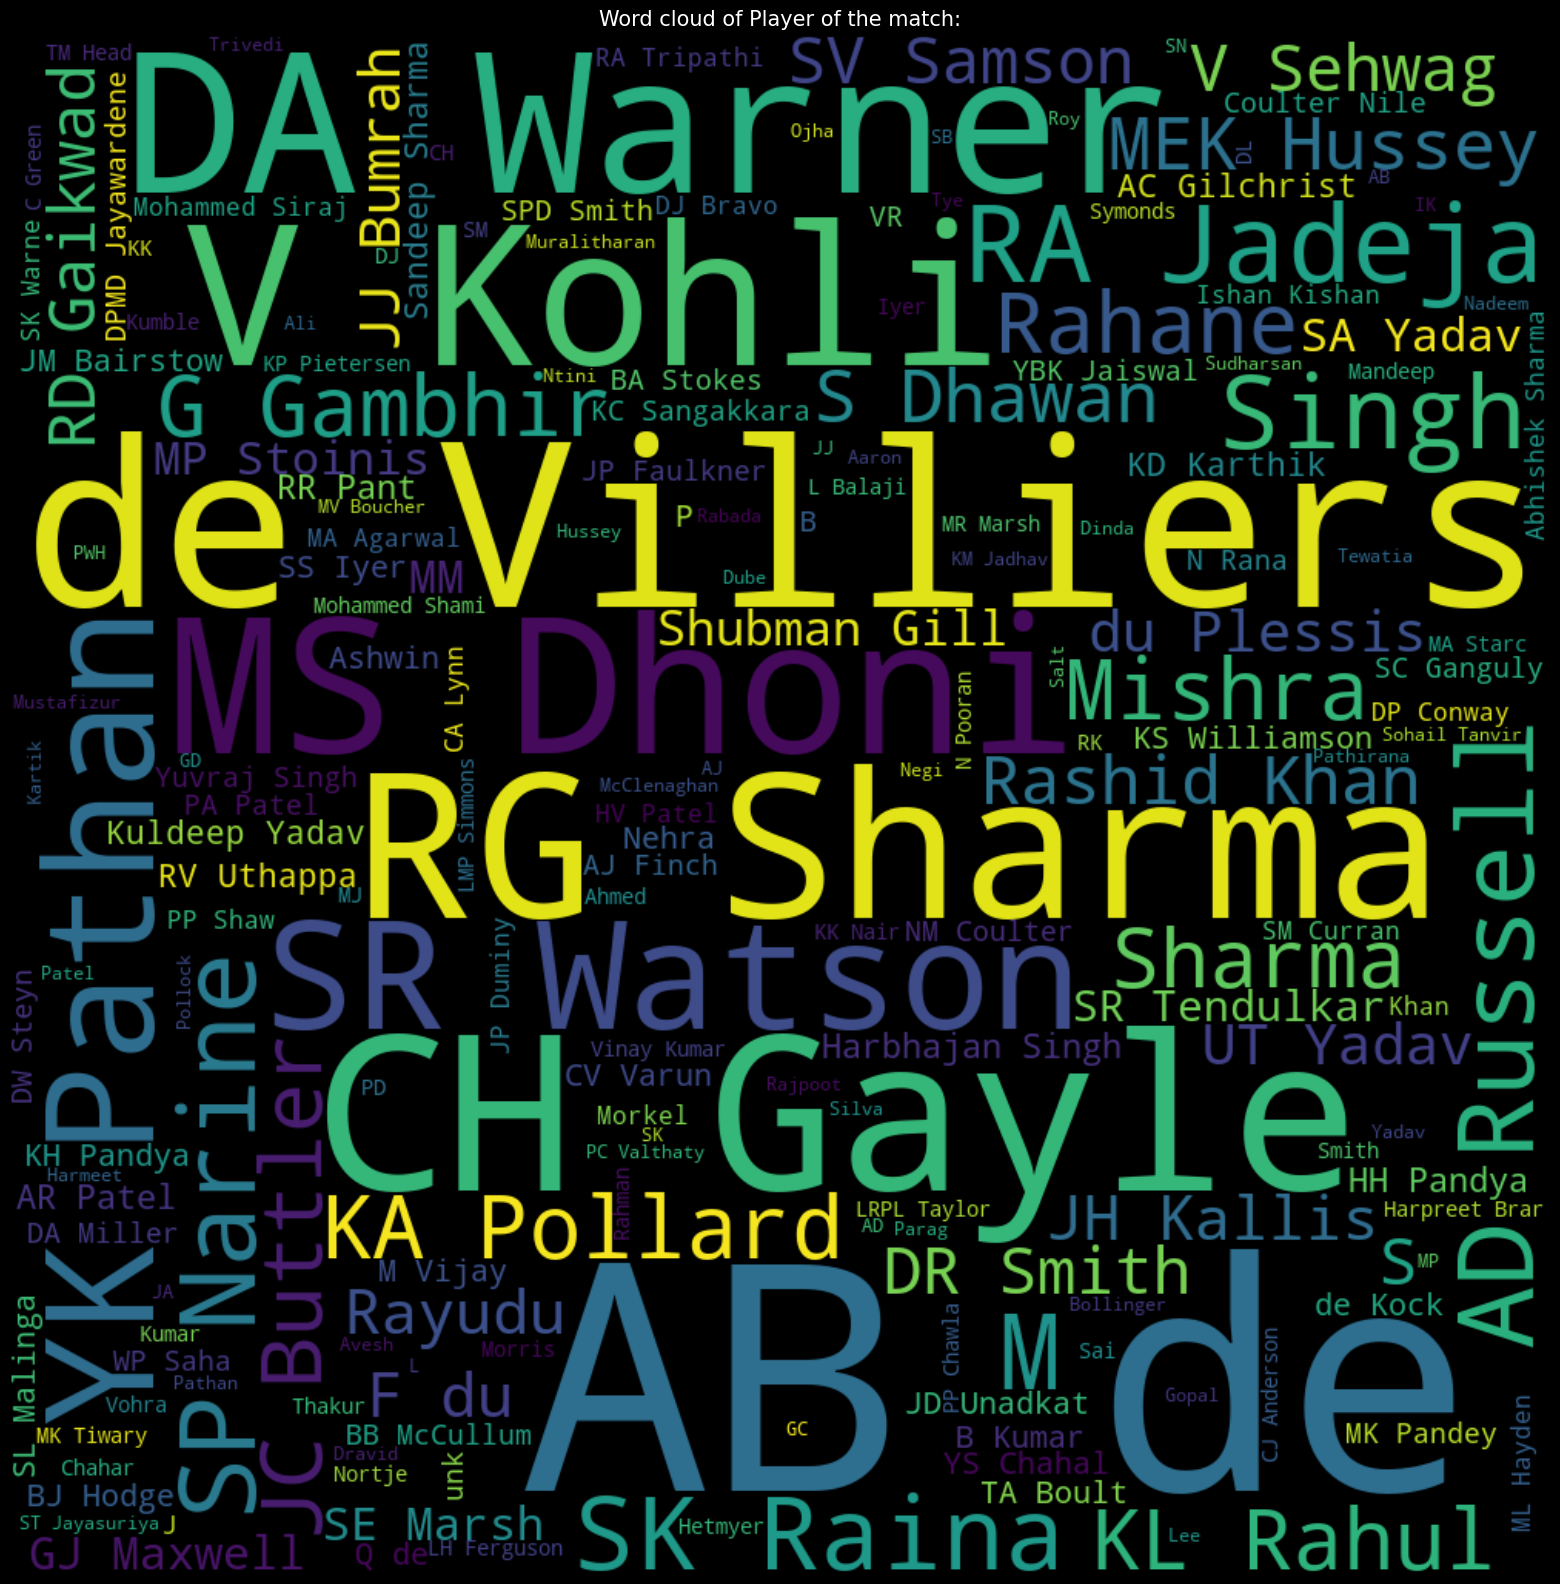

In [617]:
# create word cloud:
from wordcloud import WordCloud

players = df['mom'].tolist()
ctext = " ".join(players)
cloud = WordCloud(width = 1000 , height = 1000 , background_color= 'black').generate(ctext)
plt.imshow(cloud , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud of Player of the match:' , fontsize = 15)
plt.savefig('./data/word_cloud.png')
plt.show()

# 📝 Question 3: Team Performance Clustering (10 points)

### Task:

Perform **clustering analysis** to group teams based on their performance metrics:

1. Create team-level features:

   - Win percentage
   - Average victory margin (runs/wickets)
   - Toss win to match win ratio
   - Home vs away performance

2. Apply K-means clustering to identify team categories
3. Use elbow method to determine optimal clusters
4. Visualize clusters using PCA for dimensionality reduction(optional)

### Expected Output:

- Team clusters with labels (e.g., "Dominant Teams", "Inconsistent Performers")
- Cluster characteristics interpretation

```python
# Your code here
```


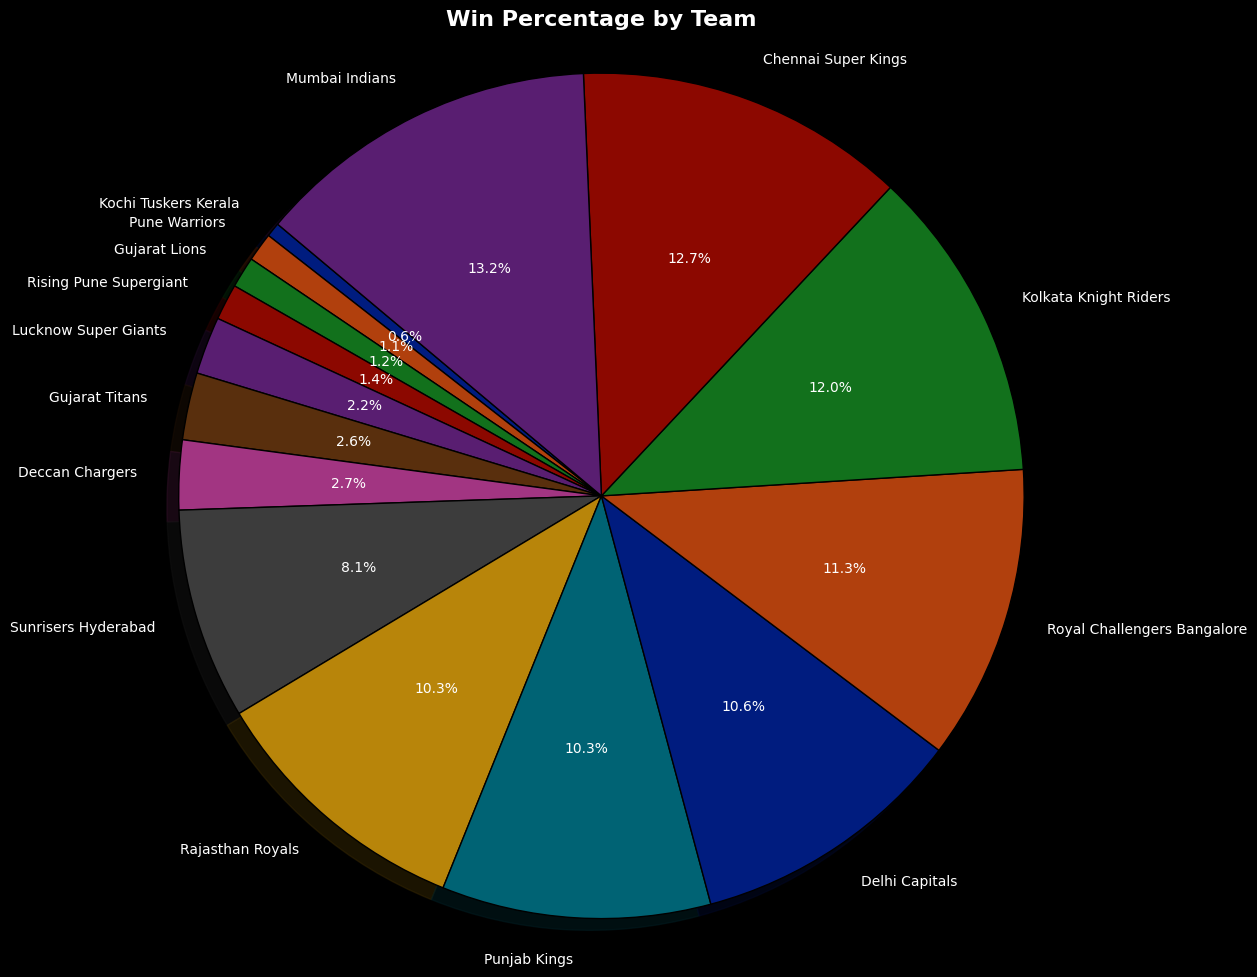

In [618]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# calculate win percentage:
winners = df[df['winner'] != 'unk']['winner']
tdf = ((winners.value_counts() / len(winners)) * 100).round(2)
t1df = tdf.reset_index().rename(columns = {'winner':'team' , 'count' : 'winp'}).sort_values(by = 'winp')
t1df


plt.figure(figsize = (12 , 12))
plt.pie(t1df['winp'] , labels = t1df.team , startangle=140 , shadow= True , autopct='%1.1f%%' , wedgeprops= {'edgecolor' : 'black'})
plt.title('Win Percentage by Team', fontsize=16, fontweight='bold')
plt.axis('equal')  # ensures pie is circular
plt.savefig('./data/q2.pie.png')
plt.show()


In [619]:
# compute average victory margin:

cols = ['winner' , 'result_margin']
# adf = df[df['winner'] != 'unk'][cols].groupby('winner').agg({'result_margin': np.mean}).reset_index().rename(columns={'winner':'team' , 'result_margin' : 'avg_result_margin'}).sort_values(by = 'team')
adf = df[df['winner'] != 'unk'].groupby(['winner' , 'result']).agg({'result_margin': np.mean}).unstack('result').reset_index().rename(columns={'winner':'team'})
adf.columns = [col[1] if col[1] else col[0] for col in adf.columns]
adf = adf[['team' , 'runs' , 'wickets']].rename(columns = {'wickets' : 'avg_wickets_margin' , 'runs' : 'avg_runs_margin'}).sort_values('team')
adf['avg_victory_margin'] = adf['avg_runs_margin'] / adf['avg_wickets_margin']
adf =adf.merge(t1df.sort_values('team'))
#merge raw win counts to the teamdf:
t2df = winners.value_counts().round(2).reset_index().rename(columns={'winner' : 'team' , 'count' : 'wins'}).sort_values('team').reset_index(drop = True).merge(adf)
t2df

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_94006/422253970.py:5: FutureWarning: The provided callable <function mean at 0x1116ff060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  adf = df[df['winner'] != 'unk'].groupby(['winner' , 'result']).agg({'result_margin': np.mean}).unstack('result').reset_index().rename(columns={'winner':'team'})


,team,wins,avg_runs_margin,avg_wickets_margin,avg_victory_margin,winp
0,Chennai Super Kings,138,34.943662,6.029851,5.795112,12.66
1,Deccan Chargers,29,23.388889,6.545455,3.573302,2.66
2,Delhi Capitals,115,25.630435,6.227273,4.115836,10.55
3,Gujarat Lions,13,1.000000,5.416667,0.184615,1.19
4,Gujarat Titans,28,34.181818,5.764706,5.929499,2.57
5,Kochi Tuskers Kerala,6,11.500000,7.500000,1.533333,0.55
6,Kolkata Knight Riders,131,33.592593,6.197368,5.420461,12.02
7,Lucknow Super Giants,24,24.437500,5.375000,4.546512,2.20
8,Mumbai Indians,144,32.971831,6.197183,5.320455,13.21
9,Pune Warriors,12,23.166667,6.000000,3.861111,1.10


In [620]:
#compute toss win to match win ratio:

cols = ['winner' , 'result_margin' , 'result' , 'toss_winner']
df['toss_winner'] = df['toss_winner'].apply(change_team_name)
adf = df[df.toss_winner == df.winner][cols]['winner'].value_counts().reset_index().sort_values('winner').rename(columns= {'winner' : 'team', 'count' : 'toss_wins'}).merge(t2df)
adf['toss_to_win'] = adf['toss_wins'] / adf['wins']
t3df = adf
t3df

,team,toss_wins,wins,avg_runs_margin,avg_wickets_margin,avg_victory_margin,winp,toss_to_win
0,Chennai Super Kings,75,138,34.943662,6.029851,5.795112,12.66,0.543478
1,Deccan Chargers,19,29,23.388889,6.545455,3.573302,2.66,0.655172
2,Delhi Capitals,61,115,25.630435,6.227273,4.115836,10.55,0.530435
3,Gujarat Lions,10,13,1.000000,5.416667,0.184615,1.19,0.769231
4,Gujarat Titans,14,28,34.181818,5.764706,5.929499,2.57,0.500000
5,Kochi Tuskers Kerala,4,6,11.500000,7.500000,1.533333,0.55,0.666667
6,Kolkata Knight Riders,68,131,33.592593,6.197368,5.420461,12.02,0.519084
7,Lucknow Super Giants,10,24,24.437500,5.375000,4.546512,2.20,0.416667
8,Mumbai Indians,78,144,32.971831,6.197183,5.320455,13.21,0.541667
9,Pune Warriors,3,12,23.166667,6.000000,3.861111,1.10,0.250000


In [621]:
#compute home vs away performance:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'home_advantage', 'match_importance',
       'toss_advantage', 'match_number', 'total_matches', 'early_cut',
       'mid_cut', 'season_phase', 'nvenue', 'mom'],
      dtype='object')

In [622]:
#compute home wins vs away wins:

cols = ['winner' , 'result_margin' , 'result' , 'toss_winner' , 'home_advantage']
wins = df[cols].groupby('winner').agg({'home_advantage' : np.sum}).reset_index().rename(columns={'winner' : 'team' , 'home_advantage' : 'home_wins'}).merge(t3df)
t4df = df[cols].groupby('winner').agg({'home_advantage' : lambda x : len(x) - np.sum(x)}).reset_index().rename(columns={'winner' : 'team' , 'home_advantage' : 'away_wins'}).merge(wins)
teamdf = t4df
teamdf

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_94006/3640491562.py:4: FutureWarning: The provided callable <function sum at 0x1116fdf80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  wins = df[cols].groupby('winner').agg({'home_advantage' : np.sum}).reset_index().rename(columns={'winner' : 'team' , 'home_advantage' : 'home_wins'}).merge(t3df)


,team,away_wins,home_wins,toss_wins,wins,avg_runs_margin,avg_wickets_margin,avg_victory_margin,winp,toss_to_win
0,Chennai Super Kings,70,68,75,138,34.943662,6.029851,5.795112,12.66,0.543478
1,Deccan Chargers,17,12,19,29,23.388889,6.545455,3.573302,2.66,0.655172
2,Delhi Capitals,60,55,61,115,25.630435,6.227273,4.115836,10.55,0.530435
3,Gujarat Lions,2,11,10,13,1.000000,5.416667,0.184615,1.19,0.769231
4,Gujarat Titans,16,12,14,28,34.181818,5.764706,5.929499,2.57,0.500000
5,Kochi Tuskers Kerala,1,5,4,6,11.500000,7.500000,1.533333,0.55,0.666667
6,Kolkata Knight Riders,57,74,68,131,33.592593,6.197368,5.420461,12.02,0.519084
7,Lucknow Super Giants,18,6,10,24,24.437500,5.375000,4.546512,2.20,0.416667
8,Mumbai Indians,60,84,78,144,32.971831,6.197183,5.320455,13.21,0.541667
9,Pune Warriors,3,9,3,12,23.166667,6.000000,3.861111,1.10,0.250000


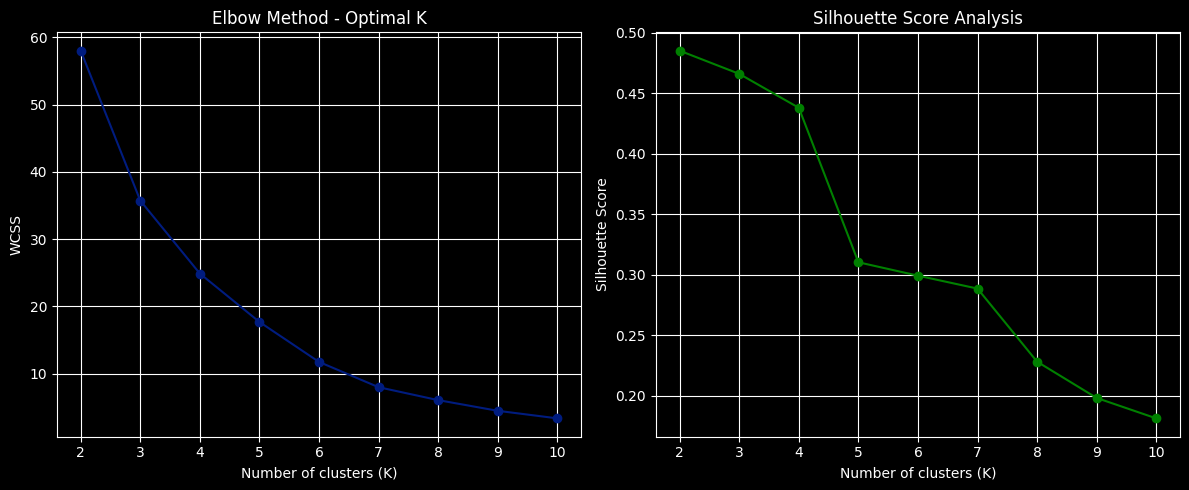

2

In [623]:
#apply kmean clusturing:
# Select features for clustering
features = [
    'away_wins', 'home_wins', 'toss_wins', 'wins',
    'avg_runs_margin', 'avg_wickets_margin', 'avg_victory_margin',
    'winp', 'toss_to_win'
    ]
X = teamdf[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to determine the optimal number of clusters
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score Analysis')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Return best K based on max silhouette score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k



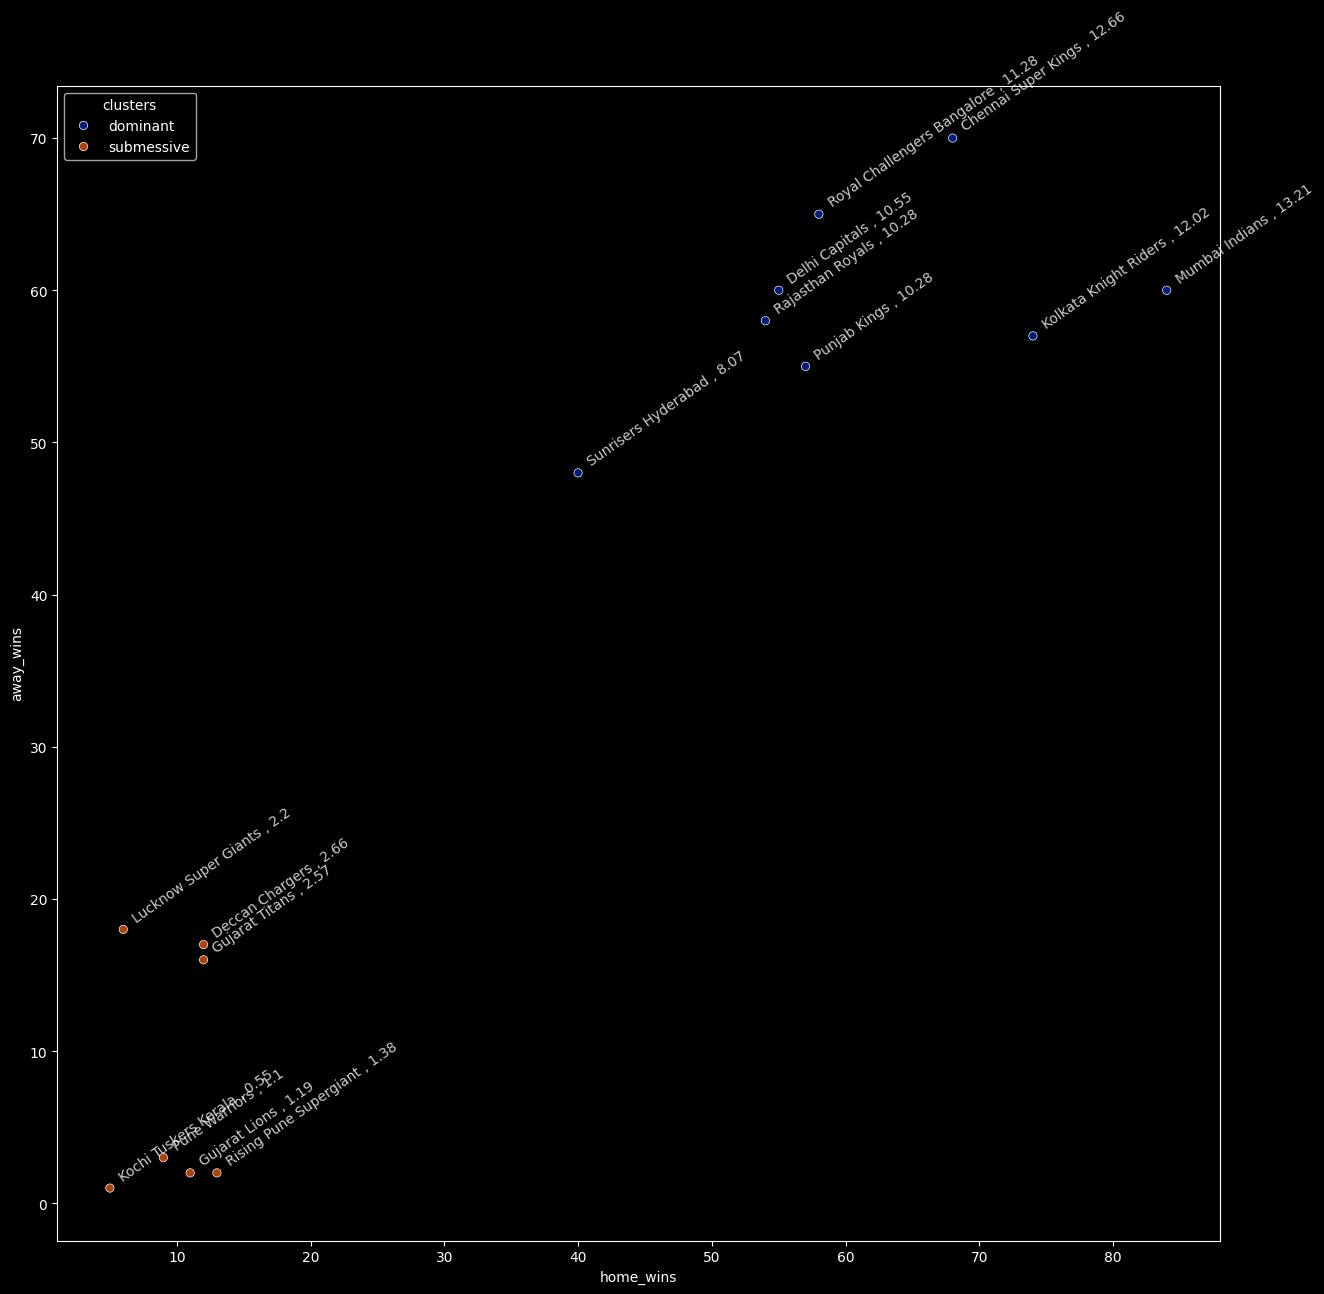

In [624]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
teamdf['clusters'] = clusters
teamdf['clusters'] = teamdf['clusters'].apply(lambda x : 'dominant' if x == 1 else 'submessive')
plt.figure(figsize = (15 , 15))
sns.scatterplot(teamdf , x = 'home_wins' , y = 'away_wins' , hue = 'clusters')
for i , row in teamdf.iterrows():
    # print(i , row['team'])
    plt.text(row['home_wins'] + 0.5 , row['away_wins']  + 0.5, f"{row['team']} , {row['winp']}" , color = 'white' , alpha = 0.8 , rotation = 35)
plt.savefig('./data/q3.png')
plt.show()

# 📝 Question 4: Strategic Pattern Mining (10 points)

### Task:

Use **Association Rule Mining (ARM)** to discover winning patterns:

1. Create transactions from match attributes:

   - Toss decision (bat/field)
   - Venue type (home/away/neutral)
   - Match phase (powerplay/middle/death)
   - Result (win/loss)

2. Find association rules with:

   - Minimum support: 0.1
   - Minimum confidence: 0.7

3. Identify top 5 rules that lead to match victories

### Business Question:

"What combinations of factors most strongly predict match outcomes?"


In [625]:
#create venue type feature:
def vtype(row):
    if row['city'] in ttc[row['team1']]:
        return 'home'
    if row['city'] in ttc[row['team2']]:
        return 'away'
    return 'neutral'

df['venue_type'] = df.apply(vtype , axis = 1)
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,match_importance,toss_advantage,match_number,total_matches,early_cut,mid_cut,season_phase,nvenue,mom,venue_type
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,league,False,1,58,19,38,Early,M.Chinnaswamy Stadium,BB.McCullum,home
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,league,True,2,58,19,38,Early,Punjab Cricket Association IS Bindra Stadium,MEK.Hussey,home
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,league,False,3,58,19,38,Early,Feroz Shah Kotla,MF.Maharoof,home
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,league,False,4,58,19,38,Early,Wankhede Stadium,MV.Boucher,home
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,league,False,5,58,19,38,Early,Eden Gardens,DJ.Hussey,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,league,False,67,71,23,47,Early,Rajiv Gandhi International Stadium,Abhishek.Sharma,away
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,playoff,False,68,71,23,47,Early,Narendra Modi Stadium,MA.Starc,neutral
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,...,playoff,True,69,71,23,47,Early,Narendra Modi Stadium,R.Ashwin,neutral
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,playoff,False,70,71,23,47,Early,MA Chidambaram Stadium,Shahbaz.Ahmed,neutral


In [626]:
#create transactions:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori , association_rules
xdf = df[['toss_decision' , 'venue_type' , 'season_phase' , 'result']]
transactions = xdf.values
te = TransactionEncoder()
imat = te.fit_transform(transactions)
idf = pd.DataFrame(imat , columns = te.columns_)
idf

,Early,Mid,away,bat,field,home,neutral,no result,runs,tie,wickets
0,True,False,False,False,True,True,False,False,True,False,False
1,True,False,False,True,False,True,False,False,True,False,False
2,True,False,False,True,False,True,False,False,False,False,True
3,True,False,False,True,False,True,False,False,False,False,True
4,True,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1090,True,False,True,True,False,False,False,False,False,False,True
1091,True,False,False,True,False,False,True,False,False,False,True
1092,True,False,False,False,True,False,True,False,False,False,True
1093,True,False,False,False,True,False,True,False,True,False,False


In [627]:
#create association rules:
fsets = apriori(idf , min_support= 0.1 , use_colnames = True , max_len = 3 , verbose = 1)
fsets['length'] = fsets.itemsets.str.len()
print(f"{len(fsets)} itemsets with min_support >= 10%")

rulec = association_rules(fsets , metric = 'confidence' , min_threshold = 0.5)
irules = rulec.sort_values(['confidence'] , ascending = False)
irules[["antecedents", "consequents",
      "support", "confidence", "lift"]]

Processing 132 combinations | Sampling itemset size 3
52 itemsets with min_support >= 10%


,antecedents,consequents,support,confidence,lift
29,"(neutral, field)",(Early),0.185388,0.754647,1.133523
41,"(neutral, wickets)",(Early),0.149772,0.748858,1.124829
4,(neutral),(Early),0.275799,0.725962,1.090436
39,"(neutral, runs)",(Early),0.120548,0.702128,1.054636
34,"(field, wickets)",(Early),0.234703,0.692722,1.040509
7,(wickets),(Early),0.364384,0.690311,1.036888
25,"(bat, wickets)",(Early),0.129680,0.685990,1.030397
28,"(Early, neutral)",(field),0.185388,0.672185,1.045516
2,(field),(Early),0.431963,0.671875,1.009195
54,"(neutral, wickets)",(field),0.131507,0.657534,1.022727


# 📝 Question 5: Match Outcome Prediction - Logistic Regression (10 points)

### Task:

Build a **Logistic Regression** model to predict match winners:

1. Feature engineering:

   - One-hot encode categorical variables
   - Create interaction features (team × venue, team × toss)
   - Scale numerical features

2. Handle class imbalance using **SMOTE** if necessary

3. Apply **L1 and L2 regularization**:

   - Compare model performance
   - Identify most important features

4. Evaluate using:
   - ROC-AUC score
   - Precision-Recall curve
   - Feature importance plot


In [659]:
df['win'] = df.apply(lambda x : 1 if x['winner'] == x['team1'] else 0 , axis = 1)
df[['team1' , 'team2' , 'winner' , 'win']][df['win'] == 0]

,team1,team2,winner,win
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,0
1,Punjab Kings,Chennai Super Kings,Chennai Super Kings,0
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,0
6,Deccan Chargers,Delhi Capitals,Delhi Capitals,0
8,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,0
...,...,...,...,...
1087,Rajasthan Royals,Punjab Kings,Punjab Kings,0
1090,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,0
1091,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,0
1092,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,0


In [660]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
#create interactin features:

df['team1_venue'] = df['team1'] + '-' + df['nvenue']
df['team1_toss'] = df['team1'] + '-' + df['toss_winner']
df['team1_importance'] = df['team1'] + '-' + df['match_importance'].astype(str)

df['team2_venue'] = df['team2'] + '-' + df['nvenue']
df['team2_toss'] = df['team2'] + '-' + df['toss_winner']
df['team2_importance'] = df['team2'] + '-' + df['match_importance'].astype(str)

#one hot encode categorical variables:
catcols = df.select_dtypes(include = ['object' , 'category']).columns
catcols = [col for col in catcols if col not in ['player_of_match' , 'venue' , 'winner']]
# print(f"{catcols}")

ohe = OneHotEncoder(sparse_output = False)
encoded = ohe.fit_transform(df[catcols])
ldf = pd.DataFrame(encoded , columns = ohe.get_feature_names_out())

# scale numeric variables:
ncols = df.select_dtypes(include = ['int64' , 'float64']).columns[1:]
nvars = df[ncols]

sclaer = StandardScaler()
ndf = scaler.fit_transform(nvars)
ndf = pd.DataFrame(ndf , columns = scaler.get_feature_names_out())
ndf = ndf[['season' , 'result_margin' , 'target_runs' , 'target_overs' , 'match_number']]
xdf = pd.concat([ndf , ldf] , axis = 1)
# xdf = ndf
xdf

,season,result_margin,target_runs,target_overs,match_number,city_Abu Dhabi,city_Ahmedabad,city_Bangalore,city_Bengaluru,city_Bloemfontein,...,team2_toss_Sunrisers Hyderabad-Delhi Capitals,team2_toss_Sunrisers Hyderabad-Kolkata Knight Riders,team2_toss_Sunrisers Hyderabad-Lucknow Super Giants,team2_toss_Sunrisers Hyderabad-Mumbai Indians,team2_toss_Sunrisers Hyderabad-Pune Warriors,team2_toss_Sunrisers Hyderabad-Punjab Kings,team2_toss_Sunrisers Hyderabad-Rajasthan Royals,team2_toss_Sunrisers Hyderabad-Rising Pune Supergiant,team2_toss_Sunrisers Hyderabad-Royal Challengers Bangalore,team2_toss_Sunrisers Hyderabad-Sunrisers Hyderabad
0,-1.643388,5.668781,1.675870,0.156295,-1.666259,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.643388,0.739013,2.198040,0.156295,-1.614318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.643388,-0.366729,-1.022006,0.156295,-1.562376,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.643388,-0.551020,0.022333,0.156295,-1.510434,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.643388,-0.551020,-1.573185,0.156295,-1.458493,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1.592413,-0.597092,1.443795,0.156295,1.761889,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1091,1.592413,-0.412802,-0.151723,0.156295,1.813831,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1092,1.592413,-0.597092,0.225399,0.156295,1.865772,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1093,1.592413,0.877231,0.312427,0.156295,1.917714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [661]:
from sklearn.model_selection import train_test_split
y = df['win']
xtrain , xtest , ytrain , ytest = train_test_split(xdf , y , test_size = 0.2 , random_state = 42)
print(f"{xtrain.shape = } , {xtest.shape} , {ytrain.shape} , {ytest.shape}")

xtrain.shape = (876, 1467) , (219, 1467) , (876,) , (219,)


In [662]:
#apply logistic regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , roc_curve , classification_report

model1 = LogisticRegression(penalty= 'l1' , solver = 'liblinear' , C = 0.1 , random_state= 42)
model2 = LogisticRegression(penalty= 'l2' , solver = 'lbfgs' , C = 1.0 , random_state= 42)

# ridge regression
model = model2
model.fit(xtrain , ytrain)
ypred = model.predict(xtest)
print(f"Accuracy l2: {accuracy_score(ytest , ypred)}")

# lasso regression
model = model1
model.fit(xtrain , ytrain)
ypred = model.predict(xtest)
print(f"Accuracy l1: {accuracy_score(ytest , ypred)}")

Accuracy l2: 0.680365296803653
Accuracy l1: 0.6894977168949772


Lasso - ROC-AUC: 0.701, PR-AUC: 0.805
Ridge - ROC-AUC: 0.690, PR-AUC: 0.796


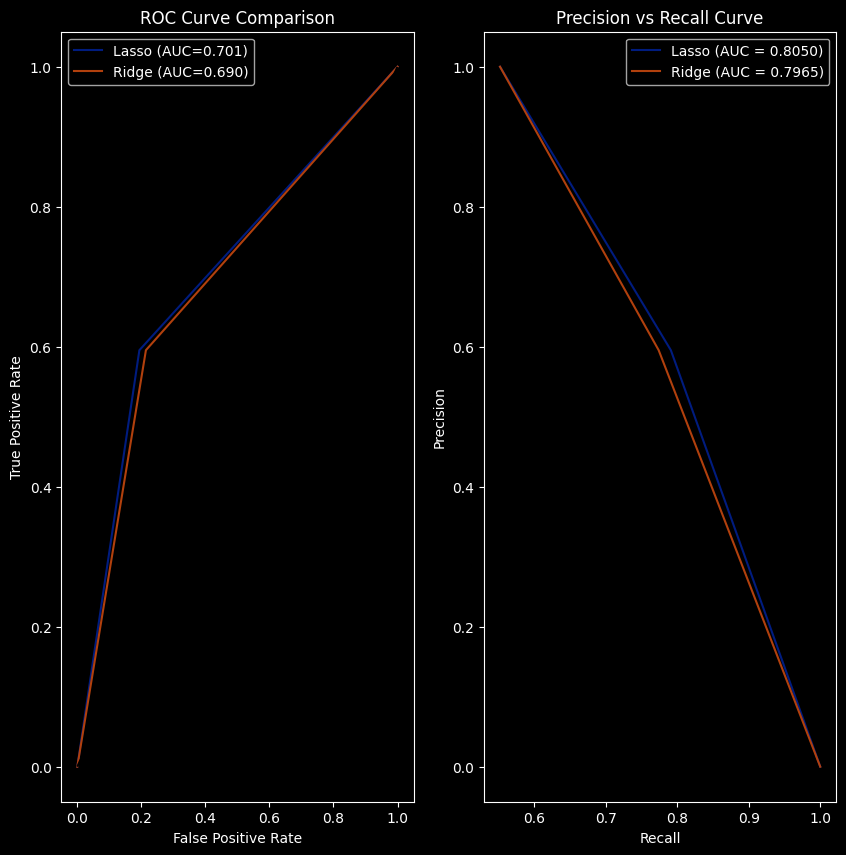

In [675]:
from sklearn.metrics import roc_curve , auc , precision_recall_curve
def evaluateModel(model , xtest , ytest , name):
    ypred = model.predict(xtest)

    #roc
    fpr , tpr , _ = roc_curve(ytest , ypred)
    roc_auc = auc(fpr , tpr)

    #precision-recall:
    precision , recall  , _ = precision_recall_curve(ytest , ypred)
    pr_auc = auc(recall , precision)
    print(f"{name} - ROC-AUC: {roc_auc:.3f}, PR-AUC: {pr_auc:.3f}")
    
    # ROC Curve
    plt.subplot(1 , 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()

    plt.subplot(1 , 2, 2)
    plt.plot(precision , recall , label = f'{name} (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision vs Recall Curve')
    plt.legend()

plt.figure(figsize = (10 , 10))
evaluateModel(model1 , xtest , ytest , 'Lasso')
evaluateModel(model2 , xtest , ytest , 'Ridge')
plt.show()

In [687]:
#top important features for lasso model:
pd.DataFrame(model1.coef_.reshape(-1 , 1)  , index= xdf.columns , columns = ['weight']).sort_values(by = 'weight' , ascending = False).head()

,weight
result_runs,1.023928
venue_type_home,0.045974
target_overs,0.033506
result_margin,0.004734
team1_venue_Kolkata Knight Riders-M.Chinnaswamy Stadium,0.000000


In [689]:
# top important features for ridge model:
pd.DataFrame(model2.coef_.reshape(-1 , 1)  , index= xdf.columns , columns = ['weight']).sort_values(by = 'weight' , ascending = False).head(10)

,weight
result_runs,1.481203
umpire1_VA Kulkarni,1.098888
umpire2_PG Pathak,1.055193
mom_SE.Marsh,1.018940
mom_DW.Steyn,0.945078
mom_KC.Sangakkara,0.907735
mom_GJ.Maxwell,0.853450
umpire1_Aleem Dar,0.845443
team2_venue_Sunrisers Hyderabad-Wankhede Stadium,0.807126
mom_RV.Uthappa,0.801743


In [ ]:

df[['venue' , 'nvenue' , 'method' , 'toss_decision' , 'toss_winner' , 'team1' , 'team2' , 'winner' , 'venue_type' , 'win']]

,venue,nvenue,method,toss_decision,toss_winner,team1,team2,winner,venue_type,win
0,M Chinnaswamy Stadium,M.Chinnaswamy Stadium,normal,field,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,home,2
1,"Punjab Cricket Association Stadium, Mohali",Punjab Cricket Association IS Bindra Stadium,normal,bat,Chennai Super Kings,Punjab Kings,Chennai Super Kings,Chennai Super Kings,home,2
2,Feroz Shah Kotla,Feroz Shah Kotla,normal,bat,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,Delhi Capitals,home,1
3,Wankhede Stadium,Wankhede Stadium,normal,bat,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,home,2
4,Eden Gardens,Eden Gardens,normal,bat,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,home,1
...,...,...,...,...,...,...,...,...,...,...
1090,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Rajiv Gandhi International Stadium,normal,bat,Punjab Kings,Punjab Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,away,2
1091,"Narendra Modi Stadium, Ahmedabad",Narendra Modi Stadium,normal,bat,Sunrisers Hyderabad,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,neutral,2
1092,"Narendra Modi Stadium, Ahmedabad",Narendra Modi Stadium,normal,field,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,neutral,2
1093,"MA Chidambaram Stadium, Chepauk, Chennai",MA Chidambaram Stadium,normal,field,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,neutral,1


# 📝 Question 6: Venue Recommendation System (10 points)

### Task:

Build a **Content-Based Recommendation System** for venues:

1. Create venue profiles based on:

   - Average runs scored
   - Batting/bowling friendly metrics
   - Weather conditions (if available)
   - Historical match results

2. For a given team, recommend top 3 venues where they should prefer to play

3. Use cosine similarity to find similar venues

### Bonus:

Implement a simple **Collaborative Filtering** approach using team-venue win matrix


In [711]:
df['result']

0          runs
1          runs
2       wickets
3       wickets
4       wickets
         ...   
1090    wickets
1091    wickets
1092    wickets
1093       runs
1094    wickets
Name: result, Length: 1095, dtype: object

In [751]:
# build venue profiles

vcols = ['nvenue' , 'target_runs' , 'result' , 'result_margin' , 'venue_type' , 'super_over' , 'toss_decision' , 'win']
vcatcols = ['result' , 'venue_type' , 'super_over' , 'toss_decision']
ohe = OneHotEncoder(sparse_output=False)
onehot = ohe.fit_transform(df[vcatcols])
vdf = pd.concat([df[[col for col in vcols if col not in vcatcols]] , pd.DataFrame(onehot , columns = ohe.get_feature_names_out())] , axis = 1)
vgdf = vdf.groupby('nvenue').mean().rename(columns = {col : f"avg_{col}" for col in vdf.columns[1:]})
vgdf.head()

,avg_target_runs,avg_result_margin,avg_win,avg_result_no result,avg_result_runs,avg_result_tie,avg_result_wickets,avg_venue_type_away,avg_venue_type_home,avg_venue_type_neutral,avg_super_over_N,avg_super_over_Y,avg_toss_decision_bat,avg_toss_decision_field
nvenue,,,,,,,,,,,,,,
Arun Jaitley Stadium,184.166667,17.733333,0.533333,0.000000,0.533333,0.033333,0.433333,0.366667,0.500000,0.133333,0.966667,0.033333,0.333333,0.666667
Barabati Stadium,168.714286,13.285714,0.714286,0.000000,0.571429,0.000000,0.428571,0.000000,0.000000,1.000000,1.000000,0.000000,0.285714,0.714286
Barsapara Cricket Stadium,181.000000,22.333333,0.666667,0.000000,0.666667,0.000000,0.333333,0.000000,0.000000,1.000000,1.000000,0.000000,0.333333,0.666667
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium,157.428571,18.857143,0.500000,0.071429,0.500000,0.000000,0.428571,0.428571,0.571429,0.000000,1.000000,0.000000,0.428571,0.571429
Brabourne Stadium,179.518519,16.481481,0.592593,0.000000,0.518519,0.000000,0.481481,0.111111,0.296296,0.592593,1.000000,0.000000,0.333333,0.666667


In [773]:
#create team profiles:
tcols = vcols[1:]
tdf = df[tcols]
# tdf = pd.concat([df[['team1'] + tcols].rename(columns= {'team1' : 'team'}) , df[['team2'] + tcols].rename(columns = {'team2' : 'team'})])
cdf = pd.concat([ df[['team1', 'team2'] + [col for col in tcols if col not in vcatcols]] , pd.DataFrame(onehot , columns = ohe.get_feature_names_out())] , axis = 1)

#get team1 and team2 into one feature:
# cdf[['team1'] + cdf.columns[2:]]
tdf = pd.concat([cdf[[col for col in cdf.columns if col != 'team2']].rename(columns = {'team1' : 'team'}) , cdf[[col for col in cdf.columns if col != 'team1']].rename(columns = {'team2' : 'team'})])
tgdf = tdf.groupby('team').mean().rename(columns = {col : f"avg_{col}" for col in tdf.columns[1:]})
tgdf.head()

,avg_target_runs,avg_result_margin,avg_win,avg_result_no result,avg_result_runs,avg_result_tie,avg_result_wickets,avg_venue_type_away,avg_venue_type_home,avg_venue_type_neutral,avg_super_over_N,avg_super_over_Y,avg_toss_decision_bat,avg_toss_decision_field
team,,,,,,,,,,,,,,
Chennai Super Kings,165.978992,17.365546,0.508403,0.004202,0.462185,0.004202,0.529412,0.121849,0.457983,0.420168,0.995798,0.004202,0.436975,0.563025
Deccan Chargers,160.626667,15.733333,0.440000,0.000000,0.520000,0.000000,0.480000,0.013333,0.560000,0.426667,1.000000,0.000000,0.493333,0.506667
Delhi Capitals,164.373016,17.694444,0.523810,0.007937,0.476190,0.015873,0.500000,0.083333,0.527778,0.388889,0.984127,0.015873,0.361111,0.638889
Gujarat Lions,169.233333,11.933333,0.366667,0.000000,0.166667,0.033333,0.800000,0.033333,0.800000,0.166667,0.966667,0.033333,0.100000,0.900000
Gujarat Titans,174.777778,15.177778,0.400000,0.000000,0.400000,0.000000,0.600000,0.111111,0.533333,0.355556,1.000000,0.000000,0.311111,0.688889


In [787]:
#create recommendations from profiles:
from sklearn.metrics.pairwise import cosine_similarity

#get common features:
nteams = tgdf.select_dtypes(include = [np.number]).columns.tolist()
nvenues = vgdf.select_dtypes(include = [np.number]).columns.tolist()
commonf = list(set(nteams).intersection(nvenues))

#standardize:

scaler = StandardScaler()
combined = pd.concat([tgdf[commonf] , vgdf[commonf]] , axis = 0)
scaler.fit(combined)
vscaled = pd.DataFrame(scaler.transform(vgdf[commonf]) , index = vgdf.index , columns = commonf)
tscaled = pd.DataFrame(scaler.transform(tgdf[commonf]) , index = tgdf.index , columns = commonf)

#compute cosine similarity:
smat = pd.DataFrame(cosine_similarity(tscaled.values , vscaled.values) , index = tgdf.index , columns = vgdf.index)
smat

nvenue,Arun Jaitley Stadium,Barabati Stadium,Barsapara Cricket Stadium,Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium,Brabourne Stadium,Buffalo Park,De Beers Diamond Oval,Dr DY Patil Sports Academy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,Dubai International Cricket Stadium,...,Sawai Mansingh Stadium,Shaheed Veer Narayan Singh International Stadium,Sharjah Cricket Stadium,Sheikh Zayed Stadium,St George's Park,Subrata Roy Sahara Stadium,SuperSport Park,Vidarbha Cricket Association Stadium,Wankhede Stadium,Zayed Cricket Stadium
team,,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,0.396500,-0.139941,0.107932,0.375997,0.484718,0.135386,-0.012121,0.064242,-0.008847,-0.704793,...,0.614295,-0.330481,-0.344795,-0.678389,0.175970,0.371378,-0.290208,-0.091969,0.458742,-0.321804
Deccan Chargers,-0.270472,-0.157030,-0.001988,-0.115954,-0.030286,0.323066,-0.091315,-0.191570,0.309281,-0.488496,...,0.072525,-0.145522,-0.051093,-0.335507,0.390802,0.846747,-0.006110,0.320812,-0.089658,0.071895
Delhi Capitals,0.529073,-0.126649,0.094488,0.518800,0.197712,-0.219705,-0.582670,-0.385787,-0.235605,-0.065422,...,0.251447,-0.690510,-0.672109,-0.245990,-0.440041,0.012019,-0.887406,-0.347624,0.444943,-0.805102
Gujarat Lions,0.083438,-0.475208,-0.594866,-0.165458,-0.234550,-0.856506,-0.376351,-0.029822,-0.592285,0.037752,...,0.272745,-0.148743,0.272769,0.181267,-0.402363,-0.337456,-0.014408,-0.782535,0.484369,0.152425
Gujarat Titans,0.279504,-0.277531,-0.158155,-0.047854,0.356644,-0.624410,-0.380534,0.332866,-0.200639,-0.494966,...,0.334150,-0.377590,0.316139,-0.357537,-0.127552,-0.025156,-0.076099,-0.594760,0.751623,0.245865
Kochi Tuskers Kerala,-0.530061,-0.354878,-0.650204,-0.087989,-0.510807,-0.244046,-0.025598,-0.125408,-0.392605,-0.524344,...,0.550372,0.312969,0.077981,-0.344323,-0.181523,0.193316,0.208852,-0.133825,0.030634,0.071750
Kolkata Knight Riders,0.405245,-0.382171,-0.486416,-0.116394,-0.067700,-0.644347,-0.477656,-0.036331,-0.667569,-0.175180,...,0.669986,-0.260862,-0.280869,-0.168458,-0.587800,-0.194175,-0.406551,-0.590540,0.703936,-0.405405
Lucknow Super Giants,0.600816,0.367934,0.559471,0.625736,0.635285,0.124383,-0.232032,0.191303,0.094114,-0.204802,...,0.066734,-0.396378,-0.507764,-0.469784,-0.253298,-0.153607,-0.579750,0.107329,0.360653,-0.557175
Mumbai Indians,0.870584,-0.187599,0.046844,0.128219,0.413761,-0.324148,-0.582548,0.080934,-0.258875,-0.159297,...,0.484998,-0.700679,-0.533884,-0.282940,-0.393057,-0.030536,-0.797763,-0.446074,0.817739,-0.661220


In [799]:
#get recommendations for teams:
def recommend_venue(team , smat):
    return smat.loc[team].sort_values(ascending = False)[:5].index.tolist()

nteams = sorted(df['team1'].unique())

for team in nteams:
    print(f"{team}: {recommend_venue(team , smat)}")

Chennai Super Kings: ['Rajiv Gandhi International Stadium', 'Sawai Mansingh Stadium', 'Eden Gardens', 'Punjab Cricket Association IS Bindra Stadium', 'Brabourne Stadium']
Deccan Chargers: ['Subrata Roy Sahara Stadium', 'Nehru Stadium', 'Feroz Shah Kotla', 'Kingsmead', "St George's Park"]
Delhi Capitals: ['M.Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Arun Jaitley Stadium', 'Punjab Cricket Association IS Bindra Stadium', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium']
Gujarat Lions: ['Saurashtra Cricket Association Stadium', 'Green Park', 'Narendra Modi Stadium', 'Holkar Cricket Stadium', 'Punjab Cricket Association IS Bindra Stadium']
Gujarat Titans: ['Narendra Modi Stadium', 'Wankhede Stadium', 'Punjab Cricket Association IS Bindra Stadium', 'Maharaja Yadavindra Singh International Cricket Stadium', 'Eden Gardens']
Kochi Tuskers Kerala: ['Sawai Mansingh Stadium', 'Eden Gardens', 'Feroz Shah Kotla', 'Punjab Cricket Association IS Bindra Stadium', 'Nehru Stadium']
Kolkata

# 📝 Question 7: Performance Trend Analysis (8 points)

### Task:

Use **Linear Regression** to analyze performance trends:

1. Track team performance over seasons:

   - Create yearly win percentage for each team
   - Fit linear regression to identify improving/declining teams

2. Predict next season performance

3. Identify factors affecting performance trends:
   - Player retention
   - Home ground advantage
   - Toss luck factor

### Visualization:

- Time series plot with regression lines for top 5 teams


In [ ]:
#yearly win percentage for each team
cols = ['team1' , 'team2' , 'season' , 'win']
# df[cols]

# convert (t, t, s, w) -> (t , s, w):


,team1,team2,season,win
0,Royal Challengers Bangalore,Kolkata Knight Riders,2008,0
1,Punjab Kings,Chennai Super Kings,2008,0
2,Delhi Capitals,Rajasthan Royals,2008,1
3,Mumbai Indians,Royal Challengers Bangalore,2008,0
4,Kolkata Knight Riders,Deccan Chargers,2008,1
...,...,...,...,...
1090,Punjab Kings,Sunrisers Hyderabad,2024,0
1091,Sunrisers Hyderabad,Kolkata Knight Riders,2024,0
1092,Royal Challengers Bangalore,Rajasthan Royals,2024,0
1093,Sunrisers Hyderabad,Rajasthan Royals,2024,1
